In [1]:
import xml.etree.ElementTree as ET
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
# 2D BURMA
tree = ET.parse('burma14.xml')
root = tree.getroot()
num_vertices = len(root.findall('.//vertex'))
costs = [[0.0] * num_vertices for _ in range(num_vertices)]

count_vertex = 0
for vertex in root.findall('.//vertex'):
    source_id = count_vertex

    for edge in vertex.findall('edge'):
        target_id = int(edge.text)
        cost = float(edge.get('cost'))
        costs[source_id - 1][target_id - 1] = cost 
        
    count_vertex += 1

for row in costs:
    print(row)


[0.0, 422.0, 664.0, 997.0, 598.0, 507.0, 197.0, 311.0, 479.0, 310.0, 581.0, 417.0, 376.0, 153.0]
[422.0, 0.0, 289.0, 744.0, 390.0, 437.0, 491.0, 645.0, 880.0, 618.0, 374.0, 455.0, 211.0, 510.0]
[664.0, 289.0, 0.0, 491.0, 265.0, 410.0, 664.0, 804.0, 1070.0, 768.0, 259.0, 499.0, 310.0, 706.0]
[997.0, 744.0, 491.0, 0.0, 400.0, 514.0, 902.0, 990.0, 1261.0, 947.0, 418.0, 635.0, 636.0, 966.0]
[598.0, 390.0, 265.0, 400.0, 0.0, 168.0, 522.0, 634.0, 910.0, 593.0, 19.0, 284.0, 239.0, 581.0]
[507.0, 437.0, 410.0, 514.0, 168.0, 0.0, 389.0, 482.0, 757.0, 439.0, 163.0, 124.0, 232.0, 455.0]
[197.0, 491.0, 664.0, 902.0, 522.0, 389.0, 0.0, 154.0, 406.0, 133.0, 508.0, 273.0, 355.0, 70.0]
[311.0, 645.0, 804.0, 990.0, 634.0, 482.0, 154.0, 0.0, 276.0, 43.0, 623.0, 358.0, 498.0, 160.0]
[479.0, 880.0, 1070.0, 1261.0, 910.0, 757.0, 406.0, 276.0, 0.0, 318.0, 898.0, 633.0, 761.0, 372.0]
[310.0, 618.0, 768.0, 947.0, 593.0, 439.0, 133.0, 43.0, 318.0, 0.0, 582.0, 315.0, 464.0, 157.0]
[581.0, 374.0, 259.0, 418.0, 1

# BASIC ACO

In [3]:
# Function to initialize pheromone levels on edges
def initialize_pheromones(num_vertices):
    return [[1.0] * num_vertices for _ in range(num_vertices)]

# Function to choose the next city based on pheromone levels and distances
def choose_next_city(current_city, allowed_cities, pheromones, distances, alpha=1.0, beta=2.0):
    allowed_cities_list = list(allowed_cities)
    pheromone_values = [
        pheromones[current_city][city] ** alpha * (1.0 / distances[current_city][city]) ** beta
        for city in allowed_cities_list
    ]
    total = sum(pheromone_values)
    probabilities = [value / total for value in pheromone_values]
    chosen_city = random.choices(allowed_cities_list, probabilities)[0]
    return chosen_city


# Function to update pheromone levels based on ant paths
def update_pheromones(pheromones, ant_paths, decay=0.3, Q=1.0):
    for path_cost, path in ant_paths:
        pheromone_increment = Q / path_cost
        for i in range(len(path) - 1):
            pheromones[path[i]][path[i + 1]] = (1.0 - decay) * pheromones[path[i]][path[i + 1]] + pheromone_increment

# Ant Colony Optimization algorithm
def ant_colony_optimization(num_ants, num_iterations, distances, alpha=1.0, beta=2.0, decay=0.3, Q=1.0):
    num_vertices = len(distances)
    pheromones = initialize_pheromones(num_vertices)

    global_best_path = None
    global_best_cost = float('inf')

    for iteration in range(num_iterations):
        ant_paths = []

        for ant in range(num_ants):
            current_city = random.randint(0, num_vertices - 1)
            allowed_cities = set(range(num_vertices))
            allowed_cities.remove(current_city)
            path = [current_city]
            path_cost = 0.0

            while allowed_cities:
                next_city = choose_next_city(current_city, allowed_cities, pheromones, distances, alpha, beta)
                path_cost += distances[current_city][next_city]
                path.append(next_city)
                allowed_cities.remove(next_city)
                current_city = next_city

            path_cost += distances[path[-1]][path[0]]  
            ant_paths.append((path_cost, path))

            if path_cost < global_best_cost:
                global_best_cost = path_cost
                global_best_path = path

        update_pheromones(pheromones, ant_paths, decay, Q)

    return global_best_path, global_best_cost


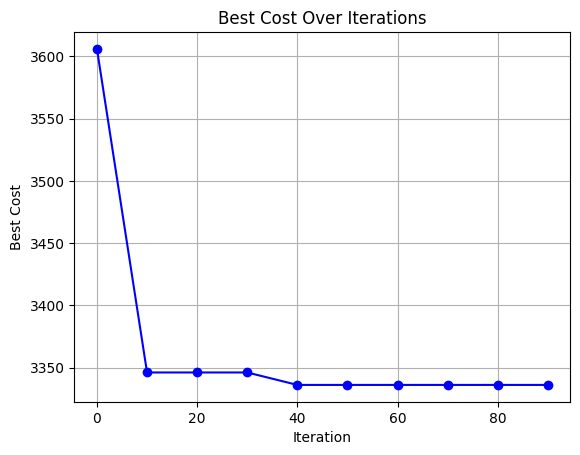

In [4]:
iterations = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
best_costs = [3606.0, 3346.0, 3346.0, 3346.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0, 3336.0]

plt.plot(iterations, best_costs, marker='o', linestyle='-', color='b')
plt.title('Best Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.grid(True)
plt.show()


In [5]:
# BURMA BASIC ACO
distances = costs  
num_ants = [50, 150, 250]
num_iterations = 100
d_num_ants = {"50": [], "150": [], "250": []}

for _ in range(5):
    print(" ")
    for i in num_ants:
        best_path, best_cost = ant_colony_optimization(i, num_iterations, distances)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants[str(i)].append(best_cost)

data = d_num_ants

 
50 Ants, Best Cost: 3394.0
150 Ants, Best Cost: 3323.0
250 Ants, Best Cost: 3323.0
 
50 Ants, Best Cost: 3403.0
150 Ants, Best Cost: 3346.0
250 Ants, Best Cost: 3346.0
 
50 Ants, Best Cost: 3490.0
150 Ants, Best Cost: 3371.0
250 Ants, Best Cost: 3336.0
 
50 Ants, Best Cost: 3381.0
150 Ants, Best Cost: 3336.0
250 Ants, Best Cost: 3336.0
 
50 Ants, Best Cost: 3471.0
150 Ants, Best Cost: 3381.0
250 Ants, Best Cost: 3336.0


In [6]:
# Calculate the mean average and interquartile range per key
mean_values = {key: np.mean(values) for key, values in data.items()}
iqr_values = {key: np.percentile(values, 75) - np.percentile(values, 25) for key, values in data.items()}

# Create a pandas DataFrame
df = pd.DataFrame(list(mean_values.items()), columns=['Ants', 'Mean'])
df['Ants'] = df['Ants'].astype(int)  
df['IQR'] = df['Ants'].astype(str).map(iqr_values)

# Sort the DataFrame by 'Key'
df = df.sort_values(by='Ants')

# Display the DataFrame
df.head()


,Ants,Mean,IQR
0,50,3427.8,77.0
1,150,3351.4,35.0
2,250,3335.4,0.0


# MMAS ACO

In [7]:
def initialize_pheromones(graph, initial_pheromone=1.0):
    pheromones = np.full_like(graph, initial_pheromone)
    np.fill_diagonal(pheromones, 0)  # Set pheromones on the diagonal to 0
    return pheromones

def ant_colony(graph, num_ants, alpha, beta, rho, q):
    pheromones = initialize_pheromones(graph)
    best_path = None
    best_cost = float('inf')

    for _ in range(num_ants):
        ant_path, ant_cost = construct_solution(graph, pheromones, alpha, beta)
        if ant_cost < best_cost:
            best_path = ant_path
            best_cost = ant_cost

        update_pheromones(pheromones, ant_path, ant_cost, rho, q)

    return best_path, best_cost

def construct_solution(graph, pheromones, alpha, beta):
    start = np.random.choice(len(graph))
    visited = set([start])
    path = [start]
    cost = 0

    while len(visited) < len(graph):
        next_node = choose_next_node(graph, pheromones, path[-1], visited, alpha, beta)
        path.append(next_node)
        visited.add(next_node)
        cost += graph[path[-2]][path[-1]]

    cost += graph[path[-1]][path[0]]
    return path, cost

def choose_next_node(graph, pheromones, current_node, visited, alpha, beta):
    unvisited_nodes = set(range(len(graph))) - visited
    probabilities = calculate_probabilities(graph, pheromones, current_node, unvisited_nodes, alpha, beta)
    next_node = np.random.choice(list(unvisited_nodes), p=probabilities)
    return next_node

def calculate_probabilities(graph, pheromones, current_node, unvisited_nodes, alpha, beta):
    probabilities = []
    total_pheromone = 0

    for node in unvisited_nodes:
        pheromone = pheromones[current_node][node]
        visibility = 1 / graph[current_node][node]
        total_pheromone += (pheromone ** alpha) * (visibility ** beta)

    for node in unvisited_nodes:
        pheromone = pheromones[current_node][node]
        visibility = 1 / graph[current_node][node]
        probability = (pheromone ** alpha) * (visibility ** beta) / total_pheromone
        probabilities.append(probability)

    return probabilities

def update_pheromones(pheromones, path, cost, rho, q):
    if cost == 0:
        # Handle the case where the cost is zero to prevent division by zero
        return

    pheromone_deposit = q / cost

    for i in range(len(path) - 1):
        if cost != 0:
            pheromones[path[i]][path[i + 1]] = (1 - rho) * pheromones[path[i]][path[i + 1]] + rho * pheromone_deposit

    if cost != 0: 
        pheromones[path[-1]][path[0]] = (1 - rho) * pheromones[path[-1]][path[0]] + rho * pheromone_deposit


def mmas_aco(graph, num_ants, num_iterations, alpha, beta, rho, q):
    best_path = None
    best_cost = float('inf')

    for _ in range(num_iterations):
        path, cost = ant_colony(graph, num_ants, alpha, beta, rho, q)
        if cost < best_cost:
            best_path = path
            best_cost = cost

    return best_path, best_cost


In [8]:
graph = costs

# Set algorithm parameters
num_iterations = 100
alpha = 1.0
beta = 2.0
rho = 0.3
q = 1.0

num_ants = [50, 150, 250]
d_num_ants2 = {"50": [], "150": [], "250": []}

for _ in range(5):
    print(" ")
    for i in num_ants:
        # Run MMAS ACO
        best_path, best_cost = mmas_aco(graph, i, num_iterations, alpha, beta, rho, q)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants2[str(i)].append(best_cost)

data2 = d_num_ants2


 
50 Ants, Best Cost: 3629.0
150 Ants, Best Cost: 3560.0
250 Ants, Best Cost: 3761.0
 
50 Ants, Best Cost: 3506.0
150 Ants, Best Cost: 3507.0
250 Ants, Best Cost: 3522.0
 
50 Ants, Best Cost: 3546.0
150 Ants, Best Cost: 3540.0
250 Ants, Best Cost: 3500.0
 
50 Ants, Best Cost: 3517.0
150 Ants, Best Cost: 3323.0
250 Ants, Best Cost: 3394.0
 
50 Ants, Best Cost: 3440.0
150 Ants, Best Cost: 3448.0
250 Ants, Best Cost: 3551.0


# Elitist ACO

In [10]:
def initialize_pheromones(graph, initial_pheromone=1.0):
    pheromones = np.full_like(graph, initial_pheromone)
    np.fill_diagonal(pheromones, 0)  # Set pheromones on the diagonal to 0
    return pheromones

def elitist_ant_colony(graph, num_ants, alpha, beta, rho, q, elite_percentage):
    pheromones = initialize_pheromones(graph)
    num_elite_ants = int(elite_percentage * num_ants)

    best_path = None
    best_cost = float('inf')

    for iteration in range(num_iterations):
        ant_path, ant_cost = construct_solution(graph, pheromones, alpha, beta)
        if ant_cost < best_cost:
            best_path = ant_path
            best_cost = ant_cost

        update_pheromones(pheromones, ant_path, ant_cost, rho, q)

        # Apply elitism only if there are elite ants
        if num_elite_ants > 0:
            elite_paths = get_elite_paths(graph, pheromones, num_elite_ants, alpha, beta)
            if elite_paths:
                update_pheromones(pheromones, elite_paths, 0, rho, q)

    return best_path, best_cost

def get_elite_paths(graph, pheromones, num_elite_ants, alpha, beta):
    elite_paths = []
    for _ in range(num_elite_ants):
        ant_path, _ = construct_solution(graph, pheromones, alpha, beta)
        elite_paths.append(ant_path)
    return elite_paths

# The rest of the code remains the same as the MMAS ACO implementation


In [11]:
# Your graph as a 2D list
graph = costs

# Set algorithm parameters
num_ants = 250
num_iterations = 100
alpha = 1.0
beta = 2.0
rho = 0.3
q = 1.0
elite_percentage = 0.1  # 10% of ants are elite ants

num_ants = [50, 150, 250]
d_num_ants3 = {"50": [], "150": [], "250": []}

for _ in range(5):
    print(" ")
    for i in num_ants:
        best_path, best_cost = elitist_ant_colony(graph, i, alpha, beta, rho, q, elite_percentage)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants3[str(i)].append(best_cost)

data3 = d_num_ants3

 
50 Ants, Best Cost: 4228.0
150 Ants, Best Cost: 3860.0
250 Ants, Best Cost: 4229.0
 
50 Ants, Best Cost: 4389.0
150 Ants, Best Cost: 4024.0
250 Ants, Best Cost: 4027.0
 
50 Ants, Best Cost: 3736.0
150 Ants, Best Cost: 4262.0
250 Ants, Best Cost: 3987.0
 
50 Ants, Best Cost: 3863.0
150 Ants, Best Cost: 4043.0
250 Ants, Best Cost: 4015.0
 
50 Ants, Best Cost: 4257.0
150 Ants, Best Cost: 4299.0
250 Ants, Best Cost: 4191.0


# Rank based AS

In [13]:
def initialize_pheromones(graph, initial_pheromone=1.0):
    pheromones = np.full_like(graph, initial_pheromone)
    np.fill_diagonal(pheromones, 0)  # Set pheromones on the diagonal to 0
    return pheromones

def rank_based_ant_system(graph, num_ants, alpha, beta, rho, q, rank_factor):
    pheromones = initialize_pheromones(graph)

    best_path = None
    best_cost = float('inf')

    for _ in range(num_iterations):
        ant_paths = []
        ant_costs = []

        # Construct solutions with ants
        for _ in range(num_ants):
            ant_path, ant_cost = construct_solution(graph, pheromones, alpha, beta)
            ant_paths.append(ant_path)
            ant_costs.append(ant_cost)

            if ant_cost < best_cost:
                best_path = ant_path
                best_cost = ant_cost

        # Update pheromones based on ranks
        update_pheromones_rank(pheromones, ant_paths, ant_costs, rank_factor, rho)

    return best_path, best_cost

def update_pheromones_rank(pheromones, ant_paths, ant_costs, rank_factor, rho):
    num_ants = len(ant_paths)

    # Rank the solutions
    sorted_indices = np.argsort(ant_costs)
    ranks = np.empty(num_ants)
    ranks[sorted_indices] = np.arange(num_ants) + 1

    # Update pheromones based on ranks
    for i in range(num_ants):
        path = ant_paths[i]
        cost = ant_costs[i]
        rank = ranks[i]

        pheromone_deposit = rank_factor / rank

        for j in range(len(path) - 1):
            pheromones[path[j]][path[j + 1]] = (1 - rho) * pheromones[path[j]][path[j + 1]] + rho * pheromone_deposit

        pheromones[path[-1]][path[0]] = (1 - rho) * pheromones[path[-1]][path[0]] + rho * pheromone_deposit

# The rest of the code remains the same as the MMAS ACO implementation

In [23]:
# Your graph as a 2D list
graph = costs

# Set algorithm parameters
num_iterations = 100
alpha = 1.0
beta = 2.0
#rho = 0.3
q = 1.0
rank_factor = 1.0  # Factor to adjust the influence of rank on pheromone update

decay_list = [0.1, 0.3, 0.5]
num_ants = [10, 50, 100]
d_num_ants4 = {"10": [], "50": [], "100": []}

for decay in decay_list:
    print("decay", decay)
    for i in num_ants:
        best_path, best_cost = rank_based_ant_system(graph, i, alpha, beta, decay, q, rank_factor)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants4[str(i)].append(best_cost)

data4 = d_num_ants4

decay 0.1
10 Ants, Best Cost: 3506.0
50 Ants, Best Cost: 3394.0
100 Ants, Best Cost: 3336.0
decay 0.3
10 Ants, Best Cost: 3461.0
50 Ants, Best Cost: 3359.0
100 Ants, Best Cost: 3371.0
decay 0.5
10 Ants, Best Cost: 3439.0
50 Ants, Best Cost: 3336.0
100 Ants, Best Cost: 3346.0


In [16]:
# Calculate the mean average and interquartile range per key
mean_values = {key: np.mean(values) for key, values in data4.items()}
iqr_values = {key: np.percentile(values, 75) - np.percentile(values, 25) for key, values in data4.items()}

# Create a pandas DataFrame
df = pd.DataFrame(list(mean_values.items()), columns=['Ants', 'Mean'])
df['Ants'] = df['Ants'].astype(int)  # Convert the 'Key' column to integers for proper sorting
df['IQR'] = df['Ants'].astype(str).map(iqr_values)

# Sort the DataFrame by 'Key'
df = df.sort_values(by='Ants')

# Display the DataFrame
df.head()

,Ants,Mean,IQR
0,10,3492.8,23.0
1,50,3341.8,23.0
2,100,3328.2,13.0


# Plots of different ACO approaches

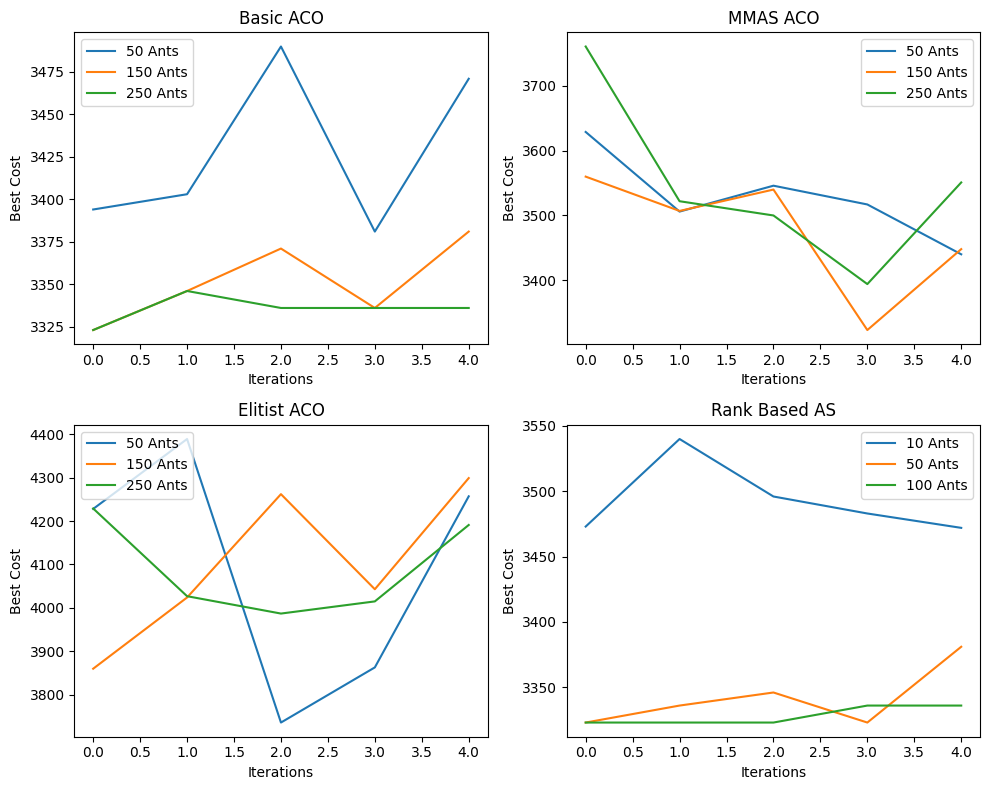

In [20]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data1
for key, values in data.items():
    axs[0, 0].plot(values, label=f'{key} Ants')

axs[0, 0].set_title('Basic ACO')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Best Cost')
axs[0, 0].legend()

# Plot data2
for key, values in data2.items():
    axs[0, 1].plot(values, label=f'{key} Ants')

axs[0, 1].set_title('MMAS ACO')
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('Best Cost')
axs[0, 1].legend()

# Plot data3
for key, values in data3.items():
    axs[1, 0].plot(values, label=f'{key} Ants')

axs[1, 0].set_title('Elitist ACO')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('Best Cost')
axs[1, 0].legend()

# Plot data4
for key, values in data4.items():
    axs[1, 1].plot(values, label=f'{key} Ants')

axs[1, 1].set_title('Rank Based AS')
axs[1, 1].set_xlabel('Iterations')
axs[1, 1].set_ylabel('Best Cost')
axs[1, 1].legend()

plt.tight_layout()
plt.show()
